In [1]:
 #importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Load Data

In [2]:
data = pd.read_excel(r'new_landprice.xlsx')
df = pd.DataFrame(data)
df

Dzongkhag      Gewog                          Chiwog Category     Types  \
0     Bumthang  Chhoekhor            PEDTSHELING_TAMZHING  Class B  Kamzhing   
1     Bumthang       Tang              BEZUR_KUENZANGDRAG  Class B  Kamzhing   
2     Bumthang  Chhoekhor  DAWATHANG_DORJIBI_KASHINGTSAWA  Class B  Kamzhing   
3     Bumthang    Chhumig                        PHURJOEN  Class B  Kamzhing   
4     Bumthang  Chhoekhor                  KHARSA_THANGBI  Class B  Kamzhing   
...        ...        ...                             ...      ...       ...   
3127  Zhemgang      Bardo                           BARDO  Class D   Orchard   
3128  Zhemgang      Bardo                          DIGALA  Class D   Orchard   
3129  Zhemgang      Bardo                         PHULABI  Class D   Orchard   
3130  Zhemgang      Bardo                       LANGDORBI  Class D   Orchard   
3131  Zhemgang      Bardo                        KHOMSHAR  Class D   Orchard   

      Price (Nu.)  
0        12875.70  
1        12875.70  
2        12875.70  
3        12875.70  
4        12875.70  
...           ...  
3127      3446.01  
3128      3446.01  
3129      3446.01  
3130      3446.01  
3131      3446.01  

[3132 rows x 6 columns]


# Print summary of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dzongkhag    3132 non-null   object 
 1   Gewog        3132 non-null   object 
 2   Chiwog       3132 non-null   object 
 3   Category     3132 non-null   object 
 4   Types        3132 non-null   object 
 5   Price (Nu.)  3132 non-null   float64
dtypes: float64(1), object(5)
memory usage: 146.9+ KB


# Check null values for all the colums in the dataset

In [4]:
    df.isnull().sum()

Dzongkhag      0
Gewog          0
Chiwog         0
Category       0
Types          0
Price (Nu.)    0
dtype: int64

# Check datatypes of all the columns

In [5]:
df.dtypes

Dzongkhag       object
Gewog           object
Chiwog          object
Category        object
Types           object
Price (Nu.)    float64
dtype: object

# Handling Missing Values For numerical and categorical data

In [6]:
categorical_features = df.select_dtypes(include='object')
categorical_features

Dzongkhag      Gewog                          Chiwog Category     Types
0     Bumthang  Chhoekhor            PEDTSHELING_TAMZHING  Class B  Kamzhing
1     Bumthang       Tang              BEZUR_KUENZANGDRAG  Class B  Kamzhing
2     Bumthang  Chhoekhor  DAWATHANG_DORJIBI_KASHINGTSAWA  Class B  Kamzhing
3     Bumthang    Chhumig                        PHURJOEN  Class B  Kamzhing
4     Bumthang  Chhoekhor                  KHARSA_THANGBI  Class B  Kamzhing
...        ...        ...                             ...      ...       ...
3127  Zhemgang      Bardo                           BARDO  Class D   Orchard
3128  Zhemgang      Bardo                          DIGALA  Class D   Orchard
3129  Zhemgang      Bardo                         PHULABI  Class D   Orchard
3130  Zhemgang      Bardo                       LANGDORBI  Class D   Orchard
3131  Zhemgang      Bardo                        KHOMSHAR  Class D   Orchard

[3132 rows x 5 columns]

In [7]:
categorical_features.isnull().sum()

Dzongkhag    0
Gewog        0
Chiwog       0
Category     0
Types        0
dtype: int64

In [8]:
numerical_features = df.select_dtypes(include='number') 
numerical_features

Price (Nu.)
0        12875.70
1        12875.70
2        12875.70
3        12875.70
4        12875.70
...           ...
3127      3446.01
3128      3446.01
3129      3446.01
3130      3446.01
3131      3446.01

[3132 rows x 1 columns]

In [9]:
 numerical_features.isnull().sum()

Price (Nu.)    0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer
imputeCat = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
categorical_df = imputeCat.fit_transform(categorical_features)
categorical_df = pd.DataFrame(data=categorical_df, columns = categorical_features.columns)
categorical_df

Dzongkhag      Gewog                          Chiwog Category     Types
0     Bumthang  Chhoekhor            PEDTSHELING_TAMZHING  Class B  Kamzhing
1     Bumthang       Tang              BEZUR_KUENZANGDRAG  Class B  Kamzhing
2     Bumthang  Chhoekhor  DAWATHANG_DORJIBI_KASHINGTSAWA  Class B  Kamzhing
3     Bumthang    Chhumig                        PHURJOEN  Class B  Kamzhing
4     Bumthang  Chhoekhor                  KHARSA_THANGBI  Class B  Kamzhing
...        ...        ...                             ...      ...       ...
3127  Zhemgang      Bardo                           BARDO  Class D   Orchard
3128  Zhemgang      Bardo                          DIGALA  Class D   Orchard
3129  Zhemgang      Bardo                         PHULABI  Class D   Orchard
3130  Zhemgang      Bardo                       LANGDORBI  Class D   Orchard
3131  Zhemgang      Bardo                        KHOMSHAR  Class D   Orchard

[3132 rows x 5 columns]

In [11]:
impute_Num = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
numerical_df = impute_Num.fit_transform(numerical_features)
numerical_df = pd.DataFrame(data =numerical_df, columns = numerical_features.columns)
numerical_df 

Price (Nu.)
0        12875.70
1        12875.70
2        12875.70
3        12875.70
4        12875.70
...           ...
3127      3446.01
3128      3446.01
3129      3446.01
3130      3446.01
3131      3446.01

[3132 rows x 1 columns]

# Scaling Numerical Features

In [12]:
# numerical_df1=numerical_df.drop(["Kamzhing (Nu.)"],axis=1)
# numerical_df1
# ndf = numerical_df.drop(["Kamzhing (Nu.)"], axis=1)
# ndf

In [13]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# numeric = scaler.fit_transform(numerical_df1)

In [14]:
# ndf = pd.DataFrame(data = numeric, columns = numerical_df.columns)
# ndf

# Encode Categorical data

In [15]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
ordinal_data=categorical_df
ordinal_data

Dzongkhag      Gewog                          Chiwog Category     Types
0     Bumthang  Chhoekhor            PEDTSHELING_TAMZHING  Class B  Kamzhing
1     Bumthang       Tang              BEZUR_KUENZANGDRAG  Class B  Kamzhing
2     Bumthang  Chhoekhor  DAWATHANG_DORJIBI_KASHINGTSAWA  Class B  Kamzhing
3     Bumthang    Chhumig                        PHURJOEN  Class B  Kamzhing
4     Bumthang  Chhoekhor                  KHARSA_THANGBI  Class B  Kamzhing
...        ...        ...                             ...      ...       ...
3127  Zhemgang      Bardo                           BARDO  Class D   Orchard
3128  Zhemgang      Bardo                          DIGALA  Class D   Orchard
3129  Zhemgang      Bardo                         PHULABI  Class D   Orchard
3130  Zhemgang      Bardo                       LANGDORBI  Class D   Orchard
3131  Zhemgang      Bardo                        KHOMSHAR  Class D   Orchard

[3132 rows x 5 columns]

In [16]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(ordinal_data)
ordinal_df = pd.DataFrame(data = encoded_data, columns = ordinal_data.columns)
ordinal_df

Dzongkhag  Gewog  Chiwog  Category  Types
0           0.0   18.0   748.0       2.0    1.0
1           0.0  167.0    78.0       2.0    1.0
2           0.0   18.0   229.0       2.0    1.0
3           0.0   22.0   774.0       2.0    1.0
4           0.0   18.0   513.0       2.0    1.0
...         ...    ...     ...       ...    ...
3127       19.0    2.0    46.0       4.0    2.0
3128       19.0    2.0   246.0       4.0    2.0
3129       19.0    2.0   773.0       4.0    2.0
3130       19.0    2.0   564.0       4.0    2.0
3131       19.0    2.0   531.0       4.0    2.0

[3132 rows x 5 columns]

In [17]:
from sklearn.preprocessing import LabelEncoder

target = numerical_df
target
# L_encoder = LabelEncoder()
# y = L_encoder.fit_transform(target_data)

Price (Nu.)
0        12875.70
1        12875.70
2        12875.70
3        12875.70
4        12875.70
...           ...
3127      3446.01
3128      3446.01
3129      3446.01
3130      3446.01
3131      3446.01

[3132 rows x 1 columns]

In [18]:
 all_df = pd.concat([ordinal_df], axis = 1)
all_df['target'] = target['Price (Nu.)'].tolist()
all_df 

Dzongkhag  Gewog  Chiwog  Category  Types    target
0           0.0   18.0   748.0       2.0    1.0  12875.70
1           0.0  167.0    78.0       2.0    1.0  12875.70
2           0.0   18.0   229.0       2.0    1.0  12875.70
3           0.0   22.0   774.0       2.0    1.0  12875.70
4           0.0   18.0   513.0       2.0    1.0  12875.70
...         ...    ...     ...       ...    ...       ...
3127       19.0    2.0    46.0       4.0    2.0   3446.01
3128       19.0    2.0   246.0       4.0    2.0   3446.01
3129       19.0    2.0   773.0       4.0    2.0   3446.01
3130       19.0    2.0   564.0       4.0    2.0   3446.01
3131       19.0    2.0   531.0       4.0    2.0   3446.01

[3132 rows x 6 columns]

# Outlier Detection

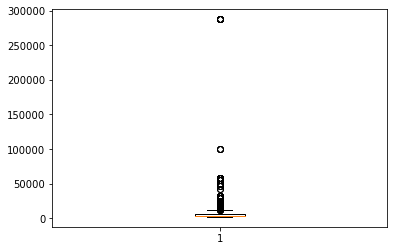

In [19]:
plt.boxplot(all_df['target'])
plt.show()

In [20]:
Q1 = all_df['target'].quantile(0.25)
Q3 = all_df['target'].quantile(0.75)
IQR = Q3-Q1
u_limit = Q3+(IQR*1.5)
l_limit = Q1-(IQR*1.5)

In [21]:
all_df1 = all_df[(all_df.target > l_limit) & (all_df.target < u_limit)]
all_df1

Dzongkhag  Gewog  Chiwog  Category  Types   target
5           0.0  194.0   892.0       3.0    1.0  8583.80
6           0.0   22.0  1017.0       3.0    1.0  8583.80
7           0.0   22.0   414.0       4.0    1.0  3852.13
8           0.0   22.0   260.0       4.0    1.0  3852.13
9           0.0   22.0   184.0       4.0    1.0  3852.13
...         ...    ...     ...       ...    ...      ...
3127       19.0    2.0    46.0       4.0    2.0  3446.01
3128       19.0    2.0   246.0       4.0    2.0  3446.01
3129       19.0    2.0   773.0       4.0    2.0  3446.01
3130       19.0    2.0   564.0       4.0    2.0  3446.01
3131       19.0    2.0   531.0       4.0    2.0  3446.01

[2814 rows x 6 columns]

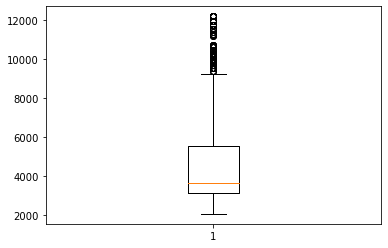

In [22]:
plt.boxplot(all_df1['target'])
plt.show()

In [23]:
all_df1.corr()

Dzongkhag     Gewog    Chiwog  Category     Types    target
Dzongkhag   1.000000  0.076089  0.002376 -0.015576 -0.006429  0.154731
Gewog       0.076089  1.000000  0.058178 -0.061556  0.001671  0.075521
Chiwog      0.002376  0.058178  1.000000 -0.014060 -0.004225 -0.001844
Category   -0.015576 -0.061556 -0.014060  1.000000  0.091571 -0.800336
Types      -0.006429  0.001671 -0.004225  0.091571  1.000000  0.134941
target      0.154731  0.075521 -0.001844 -0.800336  0.134941  1.000000

In [1]:
 import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(all_df1.corr(), annot = True)
sns.set(rc = {'figure.figsize':(20,10)})
plt.show()

NameError: name 'all_df1' is not defined

# Training Model

In [25]:
from sklearn.model_selection import train_test_split
x = all_df.drop(['target'], axis =1)
y = all_df.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [26]:
from sklearn.tree import DecisionTreeRegressor
# dtc = DecisionTreeClassifier(max_depth=3, criterion='entropy')

# #train the model
# clf = dtc.fit(x_train,y_train)
# clf 
Dtree = DecisionTreeRegressor( max_depth = 6)
tree = Dtree.fit(x_train, y_train)
tree

DecisionTreeRegressor(max_depth=6)

In [27]:
ytr_pred =  tree.predict(x_train)
ytr_pred

array([7128.64694444, 3442.36170807, 3472.08823529, ..., 2725.10956897,
       3472.08823529, 3965.05689189])

In [28]:
y_hat = tree.predict(x_test)
y_hat

array([  5165.00210526,   6953.08533835,   2725.10956897,   6503.82460526,
         6953.08533835,   3785.70259912,   3442.36170807,   3243.99353468,
         3785.70259912,   3243.99353468,  13451.64740741,   3965.05689189,
         3785.70259912,   3785.70259912,   3442.36170807,  22497.39      ,
         3442.36170807,   3442.36170807,   3243.99353468,   5109.7027027 ,
         3243.99353468,   2725.10956897,   3785.70259912,  13451.64740741,
         6953.08533835,   6953.08533835,   5109.7027027 ,   3442.36170807,
         3243.99353468,   3243.99353468,  13451.64740741,   2725.10956897,
         5109.7027027 ,   5042.242     ,   5648.5       ,  10589.32892857,
         3965.05689189,  13451.64740741,   7724.32367089,   3442.36170807,
         3243.99353468,   7724.32367089,  12875.7       ,   9608.23975   ,
         3442.36170807,   3472.08823529,   4536.90789474,  10589.32892857,
        10589.32892857,   6953.08533835,   6503.82460526,   3442.36170807,
         6953.08533835,  

# Evaluating the model

In [29]:
train_accuracy = tree.score(x_train, y_train)
test_accuracy = tree.score(x_test, y_test)
r2 = r2_score(y_test, y_hat)

print('Train set accuracy:', train_accuracy)
print('Test set accuracy', test_accuracy)
print('R2 score', r2)

Train set accuracy: 0.9890376097155321
Test set accuracy 0.9802806952567318
R2 score 0.9802806952567318


In [30]:
#Predict
sample1 = x_test.iloc[0:1,:]
sample1

Dzongkhag  Gewog  Chiwog  Category  Types
1957       17.0    4.0   186.0       3.0    0.0

In [31]:
tree.predict(sample1)[0]

5165.002105263156

In [32]:
 all_df.iloc[1957:1958:]

Dzongkhag  Gewog  Chiwog  Category  Types   target
1957       17.0    4.0   186.0       3.0    0.0  5479.49

# Pipeline

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [34]:
#Separate the Categorical and Numerical Columns
#Numeric columns
# num_cols = ndf.select_dtypes(include=['int64','float64']).columns
# print(num_cols)

#categorical columns
cate_cols = categorical_features.select_dtypes(include=['object']).columns
print(cate_cols)

Index(['Dzongkhag', 'Gewog', 'Chiwog', 'Category', 'Types'], dtype='object')


In [35]:
all_df

Dzongkhag  Gewog  Chiwog  Category  Types    target
0           0.0   18.0   748.0       2.0    1.0  12875.70
1           0.0  167.0    78.0       2.0    1.0  12875.70
2           0.0   18.0   229.0       2.0    1.0  12875.70
3           0.0   22.0   774.0       2.0    1.0  12875.70
4           0.0   18.0   513.0       2.0    1.0  12875.70
...         ...    ...     ...       ...    ...       ...
3127       19.0    2.0    46.0       4.0    2.0   3446.01
3128       19.0    2.0   246.0       4.0    2.0   3446.01
3129       19.0    2.0   773.0       4.0    2.0   3446.01
3130       19.0    2.0   564.0       4.0    2.0   3446.01
3131       19.0    2.0   531.0       4.0    2.0   3446.01

[3132 rows x 6 columns]

In [36]:
from sklearn.model_selection import train_test_split
cols = all_df.drop(['target'], axis =1).columns
X = all_df.drop(['target'], axis =1)
Y = all_df.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [37]:
c_transformer = Pipeline(steps=
                       [
                           ('imputeC',SimpleImputer(strategy='most_frequent')),
                           ('scaler', StandardScaler())
                       ])

In [38]:
 preprocessing = ColumnTransformer(transformers=
                       [
                           ('categoric',c_transformer,cate_cols)
    
                       ])

In [39]:
from sklearn.tree import DecisionTreeRegressor
estimator  = DecisionTreeRegressor(max_depth= 6)

In [40]:
mymodel = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',estimator)
                  ]) 

In [41]:
from sklearn import set_config
set_config(display='diagram')
mymodel.fit(X_train,Y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Dzongkhag', 'Gewog', 'Chiwog', 'Category', 'Types'], dtype='object'))])),
                ('est', DecisionTreeRegressor(max_depth=6))])

In [42]:
ytrain_pred = mymodel.predict(X_train) 
ytrain_pred

array([7128.64694444, 3442.36170807, 3472.08823529, ..., 2725.10956897,
       3472.08823529, 3965.05689189])

In [43]:
ytest_pred = mymodel.predict(X_test) 
ytest_pred

array([  5165.00210526,   6953.08533835,   2725.10956897,   6503.82460526,
         6953.08533835,   3785.70259912,   3442.36170807,   3243.99353468,
         3785.70259912,   3243.99353468,  13451.64740741,   3965.05689189,
         3785.70259912,   3785.70259912,   3442.36170807,  22497.39      ,
         3442.36170807,   3442.36170807,   3243.99353468,   5109.7027027 ,
         3243.99353468,   2725.10956897,   3785.70259912,  13451.64740741,
         6953.08533835,   6953.08533835,   5109.7027027 ,   3442.36170807,
         3243.99353468,   3243.99353468,  13451.64740741,   2725.10956897,
         5109.7027027 ,   5042.242     ,   5648.5       ,  10589.32892857,
         3965.05689189,  13451.64740741,   7724.32367089,   3442.36170807,
         3243.99353468,   7724.32367089,  12875.7       ,   9608.23975   ,
         3442.36170807,   3472.08823529,   4536.90789474,  10589.32892857,
        10589.32892857,   6953.08533835,   6503.82460526,   3442.36170807,
         6953.08533835,  

# Evaluation pipeline

In [44]:
train_accuracy = mymodel.score(X_train, Y_train)
test_accuracy = mymodel.score(X_test, Y_test)
r2 = r2_score(Y_test, ytest_pred)

print('Train set accuracy:', train_accuracy)
print('Test set accuracy', test_accuracy)
print('R2 score', r2)

Train set accuracy: 0.9890376097155321
Test set accuracy 0.9802806952567318
R2 score 0.9802806952567318


In [45]:
#Predict
sample = X_test.iloc[0:1,:]
sample

Dzongkhag  Gewog  Chiwog  Category  Types
1957       17.0    4.0   186.0       3.0    0.0

In [46]:
tree.predict(sample)[0]

5165.002105263156

In [47]:
all_df.iloc[1957:1958:]

Dzongkhag  Gewog  Chiwog  Category  Types   target
1957       17.0    4.0   186.0       3.0    0.0  5479.49

# Hyper-tunning

In [48]:
from sklearn.model_selection import GridSearchCV

max_depth = [1,2,3,4]

grid_params = [
  {
        "est__max_depth":max_depth,
  }
]

gs_dtree_pipeline = GridSearchCV(estimator=mymodel,
                               param_grid = grid_params,
                               scoring = 'r2',
                               cv = 10
                               )

In [49]:
 gs_model = gs_dtree_pipeline.fit(X_train, Y_train)

In [50]:
gs_model.best_estimator_

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Dzongkhag', 'Gewog', 'Chiwog', 'Category', 'Types'], dtype='object'))])),
                ('est', DecisionTreeRegressor(max_depth=4))])

In [51]:
pre = gs_model.predict(x_test)
pre

array([  7023.84953125,   7023.84953125,   3256.05973025,   7023.84953125,
         7023.84953125,   3826.58690802,   3256.05973025,   3256.05973025,
         3826.58690802,   3256.05973025,  10346.41295547,   3826.58690802,
         3826.58690802,   3826.58690802,   3256.05973025,  20079.98486486,
         3256.05973025,   3256.05973025,   3256.05973025,   3256.05973025,
         3256.05973025,   3256.05973025,   3826.58690802,  10346.41295547,
         7023.84953125,   7023.84953125,   3256.05973025,   3256.05973025,
         3256.05973025,   3256.05973025,  10346.41295547,   3256.05973025,
         3256.05973025,   7454.99904762,   3826.58690802,  10346.41295547,
         3826.58690802,  10346.41295547,  10346.41295547,   3256.05973025,
         3256.05973025,  10346.41295547,  10945.257     ,  10223.53019608,
         3256.05973025,   3826.58690802,   4604.24274194,  10346.41295547,
        10346.41295547,   7023.84953125,   7023.84953125,   3256.05973025,
         7023.84953125,  

In [52]:
pre1 = gs_model.predict(X_train)
pre1

array([7454.99904762, 3256.05973025, 3826.58690802, ..., 3256.05973025,
       3826.58690802, 3826.58690802])

In [53]:
train_accuracy = tree.score(X_train, Y_train)
test_accuracy = tree.score(X_test, Y_test)
r2 = r2_score(Y_test, ytest_pred)

print('Train set accuracy:', train_accuracy)
print('Test set accuracy', test_accuracy)
print('R2 score', r2)

Train set accuracy: 0.9890376097155321
Test set accuracy 0.9802806952567318
R2 score 0.9802806952567318


In [54]:
import pickle
pickle.dump(gs_model.best_estimator_,open("land_price_prediction.pkl",'wb'))

In [55]:
gsmodel1 = pickle.load(open("land_price_prediction.pkl",'rb'))

In [57]:
all_df1

Dzongkhag  Gewog  Chiwog  Category  Types   target
5           0.0  194.0   892.0       3.0    1.0  8583.80
6           0.0   22.0  1017.0       3.0    1.0  8583.80
7           0.0   22.0   414.0       4.0    1.0  3852.13
8           0.0   22.0   260.0       4.0    1.0  3852.13
9           0.0   22.0   184.0       4.0    1.0  3852.13
...         ...    ...     ...       ...    ...      ...
3127       19.0    2.0    46.0       4.0    2.0  3446.01
3128       19.0    2.0   246.0       4.0    2.0  3446.01
3129       19.0    2.0   773.0       4.0    2.0  3446.01
3130       19.0    2.0   564.0       4.0    2.0  3446.01
3131       19.0    2.0   531.0       4.0    2.0  3446.01

[2814 rows x 6 columns]